 has to be removed hardcoded part !/users/man-chun.yeung/microlensing/env/bin/python3

In [1]:
import sys
import os
path = os.getcwd()
dir = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(dir)

In [2]:
from jax import config
config.update("jax_enable_x64", True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from argparse import ArgumentParser

In [4]:
from lenstronomy.LensModel.lens_model import LensModel
import lensinggw.constants.constants as const
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

In [5]:
import sys
import os
path = os.getcwd()
dir = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(dir)

In [6]:
import amplification_factor.amplification_factor as af
from utils.lensing import *
from plot.plot import *

In [7]:
G = const.G  # gravitational constant [m^3 kg^-1 s^-2]
c = const.c  # speed of light [m/s]
M_sun = const.M_sun  # Solar mass [Kg]

imindex = 0

coordinates in scaled units [x (radians) /thetaE_tot]

In [8]:
y0, y1 = 0.1, 0 # source position
l0, l1 = 0.05, 0 # lens position

In [9]:
ym = 100
angle = np.radians(float(0.))
zS = 1.0
zL = 0.5

In [10]:
mL4=10

masses

In [11]:
mL1 = 1 * 1e10
mL2 = 100
mtot = mL1 + mL2

masses=[0.0875411729158816, 0.1380156891218021, 0.37757290272476596, 0.08326002905591416, 0.11751088559578819, 0.0878737809276154, 0.14164220540181344, 0.32080191454865087, 0.1432894584167837, 0.2607705005317567, 0.09098854113286821, 0.636857294268748, 0.10244447554800015, 0.11147041258795794, 0.2124085350914183, 0.6266784519859449, 0.42496685401191886, 1.1390594002155605, 0.4254607239653152, 0.1671246164756932, 0.17585315448008126, 0.36911502207552227, 0.1331235211932984, 0.6016395397587949, 0.7933744286210441, 0.42747170785219685, 0.22261658642110216, 0.10932507755278971, 0.1406444799904107, 0.1366232557128965, 0.14884236414318858, 0.19626458656021137, 0.2373647216421461, 0.1201145697485532, 0.48826716295221956, 0.3841401957379758, 0.5897595410342606, 0.1323094711391549, 0.28192039014606574, 0.3112735462148643, 0.16801321143762243, 0.1764578067996469, 0.5067566574473692, 0.27182604134636307, 0.7353778482113479, 0.20962530951686645, 0.5425268135812605, 0.6138969891002811, 0.46906093727165266, 0.6983169787970537, 0.35381175525186964, 0.1938289323334855, 0.14266664101347107, 0.5257788195498755, 0.10368483753262311, 0.17314382503980863, 0.1233372690718119, 0.2652130808997028, 0.693759954642086, 0.14899995995742654, 0.4966398131976725, 0.4840946701128482, 0.3223672452008741, 0.1264395622913355, 0.524341364391967, 0.19948743938870198, 0.3990684024548484, 0.19648096784404456, 0.6277253786806841, 0.3572078802112069, 0.10935381094455206, 0.11170719423786252, 0.5912482920999221, 0.16068614513260024, 0.16602006569289895, 0.0863316957830875, 0.29633174301563786, 0.49586795267650824, 0.7316548600797632, 0.11504195200461981, 0.6098861137208111, 0.11117674322961363, 0.16347501499569306, 0.16644621587575756, 0.2526870128594504, 0.21982758583882406, 0.22905730367878838, 0.22597567330824966, 0.8803804310615377, 0.12704243529981776, 0.11804539955670462, 0.5178623013082213, 0.14208960520058941, 0.33109270801906865, 0.8399961332019935, 0.09105580937273003, 0.4584255547405802, 0.08536227566048099, 0.21880300363881566, 0.18742408308006153, 0.3454639600005885, 0.4545124934526552, 0.08729912612402385, 0.09183479195577761, 0.27489259269705335, 0.368014432730991, 0.10586941408543118, 0.28187652197795104, 0.10588462111911362, 0.19694624181432896, 1.2348604537851748, 0.5760460254475586, 0.3468365328612529, 0.1974048180908095, 0.8088380039765515, 0.3910930527213851, 0.08031104298737239, 0.3288420759275759, 0.257701347189583, 0.204555234994582, 0.18635543058276188, 0.16009619756433785, 0.13667689840964123, 0.4436185629577214, 0.37181495338742027, 0.10829841323996174, 0.42740463344560164, 0.4648421533639838, 0.39844677434656256, 0.12276751474732411, 0.1497385231567059, 0.13455048432141956, 0.7326858566883386, 0.8469258102015667, 0.2846315707426615, 0.10361468351216026, 0.10327067036387486, 0.16093428418527544, 0.09909750488908187, 0.22017575864813146, 0.13022562568867713, 0.09817901855619601, 0.11359917921111046, 0.14787772530428508, 0.32223115967091887, 0.14438638912022622, 0.22636375822763366, 0.1508102244228382, 0.09421420103439823, 0.09420560142302992, 0.12845475317801583, 0.12031189641012763, 0.08983500253328633, 0.4522590981297488, 0.2125050533362804, 0.13405687278522366, 0.5061555804486358, 0.15199874366191218, 0.11522721689032857, 0.15331833888265486, 0.3286972499978612, 0.1364015379458153, 0.13182972564697468, 0.6773894027560546, 0.23447094849939093, 0.40490970130136555, 0.7334462880075556, 0.13398111358089174, 0.2313822106459586, 0.1024354466422358, 1.067538897792573, 0.5110531294744058, 0.3101525067706349, 0.11669327335860222, 1.1420841471405525, 0.08543067392655455, 0.1813459502352595, 0.9498566204768994, 0.14648348335645942, 0.45094492503946776, 1.1819822423988344, 0.35697005803592974, 0.1417142224960117, 1.123058038013592, 0.17114162740018618, 0.9929003645417682, 0.10171192962042469, 0.9078721119947383, 0.4224542630680143, 0.08711997693949222, 0.31989612048306554, 0.12224316374740339, 0.22403812429852143, 0.2195971752795328, 0.09764311068908389, 0.516004745947273, 1.0721607995296687, 0.26418399695334466, 0.17421612931856542, 0.31389494679546465]

masses = [0.0875411729158816, 0.1380156891218021, 0.37757290272476596, 0.08326002905591416, 0.11751088559578819, 0.0878737809276154, 0.14164220540181344, 0.32080191454865087, 0.1432894584167837, 0.2607705005317567, 0.09098854113286821, 0.636857294268748, 0.10244447554800015, 0.11147041258795794, 0.2124085350914183, 0.6266784519859449, 0.42496685401191886, 1.1390594002155605, 0.4254607239653152, 0.1671246164756932, 0.17585315448008126, 0.36911502207552227]

In [12]:
np.random.seed(0)
# masses = np.linspace(0.5, 10, 30)
masses = [10, 20]
ym = [0.5, 0.7]
angle = [0, 130]

In [13]:
mass_density = 100 # M/pc2

def conversion(masses, mass_density, cosmo, zL=0.5):<br>
    from astropy.cosmology import FlatLambdaCDM<br>
    cosmo = FlatLambdaCDM(H0=69.7, Om0=0.306, Tcmb0=2.725)<br>
    D_l = cosmo.angular_diameter_distance(zL) #MPc

    total_mass = np.sum(masses)<br>
    area =  total_mass/mass_density # pc2<br>
    radius = np.sqrt(area/np.pi) # pc radius in distant galaxy<br>
    angle_rad = radius / (D_l*1e6/u.Mpc)<br>
    angle_ac = angle_rad / ac2rad<br>
    return angle_rad

def critical_density(zL, zS):<br>
    from astropy.cosmology import FlatLambdaCDM<br>
    cosmo = FlatLambdaCDM(H0=69.7, Om0=0.306, Tcmb0=2.725)<br>
    DL       = cosmo.angular_diameter_distance(zL)<br>
    DS       = cosmo.angular_diameter_distance(zS)<br>
    DLS      = cosmo.angular_diameter_distance_z1z2(zL, zS)

    from wolensing.utils import constants as const<br>
    return const.c**2 * DL * 1e-6 / (4*np.pi*(const.G / 3.08567758128e16)*DLS*DS)

convert to radians

In [14]:
from lensinggw.utils.utils import param_processing

In [15]:
thetaE1 = param_processing(zL, zS, mL1)
thetaE2 = param_processing(zL, zS, mL2)
thetaE = param_processing(zL, zS, mtot)
thetaE4 = param_processing(zL, zS, mL4)

In [16]:
beta0, beta1 = y0 * thetaE, y1 * thetaE
eta10, eta11 = 0 * l0 * thetaE, 0 * l1 * thetaE

In [17]:
lens_model_list = ['SIS']
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}
kwargs_lens_list = [kwargs_sis_1]

In [18]:
print('thetaE1 and thetaE', thetaE1, thetaE)
kwargs_sis_1_scaled = {'center_x': eta10 / thetaE, 'center_y': eta11 / thetaE, 'theta_E': thetaE1 / thetaE}
kwargs_lens_list_scaled = [kwargs_sis_1_scaled]
from lensinggw.solver.images import microimages

thetaE1 and thetaE 8.052888061582411e-07 8.052888101846852e-07


/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:107: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:108: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packages/lensinggw-1.0.0-py3.10.egg/lensinggw/solver/images.py:117: SyntaxWarning: "is" with a literal. Did you mean "=="?
/home/manchun.yeung/.conda/envs/wolensing/lib/python3.10/site-packa

In [19]:
solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
                 'SearchWindow': 5 * thetaE2,
                 'OverlapDistMacro': 1e-17,
                 'OnlyMacro': True}

In [20]:
MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
                                                     source_pos_y=beta1,
                                                     lens_model_list=lens_model_list,
                                                     kwargs_lens=kwargs_lens_list,
                                                     **solver_kwargs)


---- Will perform only the macromodel analysis ----

---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> True
Scaled            --> False
SearchWindowMacro --> 8.052888061582412e-06
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-17
NearSource        --> False
Optimization      --> False
Verbose           --> False




MACROIMAGES

ra: [-7.24759925e-07  8.85817687e-07]
dec: [-4.23516474e-22 -4.23516474e-22]



In [21]:
Macromus = magnifications(MacroImg_ra, MacroImg_dec, lens_model_list, kwargs_lens_list)
T01 = TimeDelay(MacroImg_ra, MacroImg_dec,
                beta0, beta1,
                zL, zS,
                lens_model_list, kwargs_lens_list)

In [22]:
imindex = np.nonzero(T01)[0][0]
imindex = 1

In [23]:
microtype = imindex

injection

In [24]:
# radius = injection_radius(masses, mass_density) #rad
# lens_model_list, kwargs_lens_list = field_injection(zL, zS, MacroImg_ra[microtype], MacroImg_dec[microtype], masses, radius, lens_model_list, kwargs_lens_list)

In [25]:
# radius

print(kwargs_lens_list)<br>
exit()

In [26]:
num_points = len(masses)
for j in range(0,num_points):
    thetaE = param_processing(zL, zS, masses[j])# lens model<br>
    #positioning the microlenses<br>
    eta20 = MacroImg_ra[microtype] + ym[j]*np.cos(angle[j]) * thetaE
    eta21 = MacroImg_dec[microtype] + ym[j] * np.sin(angle[j]) * thetaE
    lens_model_list.append('POINT_MASS')
    kwargs_lens_list.append({'center_x': eta20, 'center_y': eta21, 'theta_E': thetaE})

In [27]:
    
from lensinggw.solver.images import microimages
solver_kwargs = {'SearchWindowMacro': 10 * thetaE1,
                 'SearchWindow': 100*thetaE4,
                 'Pixels': 1e3,
                 # 'Verbose': True,
                 'OverlapDist': 1e-18,
                 'ImgIndex': [1],
                 'OverlapDistMacro': 1e-17}
solver_kwargs.update({'Improvement' : 1e-13})
solver_kwargs.update({'MinDist' : 10**(-17)})

In [28]:
thetaE4

2.5465468016978704e-11

In [29]:
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.LensModel.lens_model import LensModel

In [30]:
lensmodel = LensModel(lens_model_list=lens_model_list)

In [31]:
solver = LensEquationSolver(
    lensModel = lensmodel
)

In [32]:
thetaE2, thetaE4

(8.052888061582412e-11, 2.5465468016978704e-11)

In [33]:
# Img_ra, Img_dec = solver.image_position_lenstronomy(
#     sourcePos_x = beta0,
#     sourcePos_y = beta1,
#     kwargs_lens = kwargs_lens_list,
#     min_distance = 1e-13,
#     # solver='lenstronomy'
#     search_window = 20*thetaE4,
#     verbose=True,
#     precision_limit=10**(-17),
#     x_center = MacroImg_ra[microtype],
#     y_center= MacroImg_dec[microtype]
# )

In [34]:
# Img_ra, Img_dec = solver.image_position_stochastic(
#     source_x = beta0,
#     source_y = beta1,
#     kwargs_lens = kwargs_lens_list,
#     # min_distance = 1e-13,
#     # solver='lenstronomy'
#     search_window = float(radius),
#     # verbose=True,
#     precision_limit=10**(-17),
#     x_center = MacroImg_ra[microtype],
#     y_center= MacroImg_dec[microtype]
# )

In [35]:
# Img_ra, Img_dec

In [36]:
Img_ra, Img_dec, MacroImg_ra, MacroImg_dec, pixel_width = microimages(source_pos_x=beta0,
                                                                      source_pos_y=beta1,
                                                                      lens_model_list=lens_model_list,
                                                                      kwargs_lens=kwargs_lens_list,
                                                                      **solver_kwargs)


---- Solver settings ----

The macromodel analysis will be performed with the following settings:

OnlyMacro         --> False
Scaled            --> False
SearchWindowMacro --> 8.052888061582412e-06
PixelsMacro       --> 1000
PrecisionLimit    --> 1e-20
OverlapDistMacro  --> 1e-17
NearSource        --> False
Optimization      --> False
Verbose           --> False




MACROIMAGES

ra: [-7.24759925e-07  8.85817687e-07]
dec: [-4.23516474e-22 -4.23516474e-22]


---- Solver settings ----

The complete model analysis will be performed with the following settings:

Scaled         --> False
OnlyMacro      --> False
MacroIndex     --> [0]
ImgIndex       --> [1]
SearchWindow   --> 2.5465468016978704e-09
Pixels         --> 1000.0
OverlapDist    --> 1e-18
PrecisionLimit --> 1e-20
Optimization   --> False
Verbose        --> False
Improvement    --> 1e-13
MinDist        --> 1e-17




IMAGES OF THE COMPLETE MODEL

ra: [8.85818067e-07 8.85772195e-07 8.85860419e-07 8.85817709e-07
 8.85823240e-07]
dec:

In [37]:
# Img_ra = [8.85812087e-07, 8.85606087e-07, 8.85898987e-07, 8.86087587e-07,
#  8.85874687e-07, 8.85857287e-07, 8.85460587e-07, 8.85800087e-07,
#  8.85612887e-07, 8.85960987e-07, 8.85510987e-07, 8.85748587e-07,
#  8.85864987e-07, 8.85797387e-07, 8.85839287e-07, 8.85956487e-07,
#  8.85675887e-07, 8.85575387e-07, 8.86136287e-07, 8.85555787e-07,
#  8.85854287e-07, 8.85809987e-07, 8.85938287e-07, 8.85693987e-07,
#  8.85909987e-07, 8.85499787e-07, 8.86156187e-07, 8.86140187e-07,
#  8.85814587e-07, 8.85532387e-07, 8.86047887e-07]

In [38]:
# Img_dec = [-3.096e-10, -2.751e-10, -2.334e-10, -2.177e-10, -1.942e-10, -1.747e-10,
#  -1.623e-10, -1.590e-10, -1.540e-10, -1.487e-10, -8.880e-11, -6.940e-11,
#  -6.140e-11, -6.130e-11, -5.750e-11, -4.850e-11, -4.480e-11, -4.420e-11,
#  -4.290e-11, -3.590e-11, -1.970e-11,  2.000e-13,  1.450e-11,  6.950e-11,
#   7.800e-11,  1.313e-10,  1.615e-10,  1.959e-10,  2.450e-10,  2.558e-10,
#   2.873e-10] 

<!-- # # lens model<br>
eta20, eta21 = MacroImg_ra[imindex] + np.cos(angle)*ym*thetaE2, MacroImg_dec[imindex] + np.sin(angle)*ym*thetaE2 -->

<!-- lens_model_list = ['SIS', 'POINT_MASS']<br>
kwargs_sis_1 = {'center_x': eta10, 'center_y': eta11, 'theta_E': thetaE1}<br>
kwargs_point_mass_2 = {'center_x': eta20, 'center_y': eta21, 'theta_E': thetaE2}<br>
kwargs_lens_list = [kwargs_sis_1, kwargs_point_mass_2] -->

<!-- Img_ra, Img_dec = MacroImg_ra, MacroImg_dec -->

<!-- time delays, magnifications, Morse indices and amplification factor -->

In [39]:
# from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
# from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification

In [40]:
# Img_ra = Img_ra[1:]
# Img_dec = Img_dec[1:]

In [41]:
tds = TimeDelay(Img_ra, Img_dec,
               beta0, beta1,
               zL, zS,
               lens_model_list, kwargs_lens_list)
mus = magnifications(Img_ra, Img_dec, lens_model_list, kwargs_lens_list)
ns = getMinMaxSaddle(Img_ra, Img_dec, lens_model_list, kwargs_lens_list, diff = None)                                                                                               

In [42]:
# print('Time delays (seconds): ', tds)
# print('magnifications: ', mus)
# print('Morse indices: ', ns)

In [43]:
# np.savetxt('./ra.txt', Img_ra)
# np.savetxt('./dec.txt', Img_dec)
# np.savetxt('./tds.txt', tds)
# np.savetxt('./mus.txt', mus)
# np.savetxt('./ns.txt', ns)

In [54]:
lens_model_complete = LensModel(lens_model_list=lens_model_list)
T = lens_model_complete.fermat_potential
# Img_ra = np.loadtxt('./ra.txt')
# Img_dec = np.loadtxt('./dec.txt')
T0 = thetaE ** (-2) * T(MacroImg_ra[1], MacroImg_dec[1], kwargs_lens_list, beta0, beta1)#[0]
# if not isinstance(T0, float):
#     T0 = T0[0]
Tscale = 4 * (1 + zL) * mtot * M_sun * G / c ** 3
# print('T0 = {}'.format(T0))
# print('Tscale = {}'.format(Tscale))

In [45]:
# Img_ra = Img_ra[1:]
# Img_dec = Img_dec[1:]

3.601361024178957e-11

In [46]:
# import matplotlib.pyplot as plt

In [47]:
# fig, ax = plt.subplots()
# ax = plot_contour(ax, lens_model_list, eta10, eta11, 4*thetaE1, kwargs_lens_list, beta0, beta1, MacroImg_ra, MacroImg_dec,
#                     T0 = T0, Tfac = (thetaE)**(-2), micro=False)
# plt.savefig('./macro.pdf')

[8.85818067e-07 8.85772195e-07 8.85860419e-07 8.85817709e-07
 8.85823240e-07] [-1.54336278e-10 -2.17486159e-11 -1.05794489e-11  1.38700562e-10
 -8.47281550e-12] Img_pos


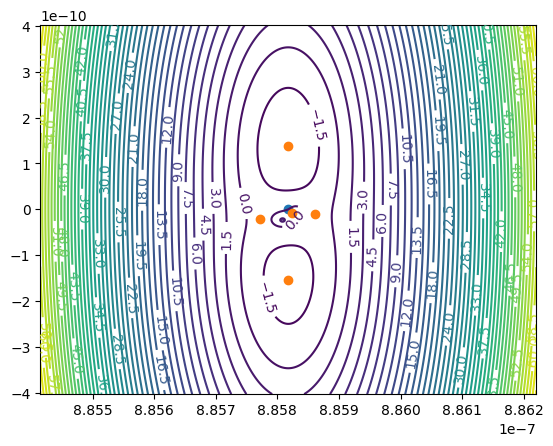

In [48]:
fig1, ax1 = plt.subplots()
ax1 = plot_contour(ax1, lens_model_list, MacroImg_ra[microtype], MacroImg_dec[microtype], 10*thetaE2, kwargs_lens_list, beta0, beta1, Img_ra, Img_dec,
                    T0 = T0, Tfac = (thetaE)**(-2), micro=True)
# plt.savefig('./micro.pdf')
# mL3 = 10
# thetaE3 = param_processing(zL, zS, mL3)

In [49]:
kwargs_macro = {'source_pos_x': beta0,
                'source_pos_y': beta1,
                'theta_E': thetaE,
                'mu': np.abs(Macromus[imindex]),
               }

In [53]:
T0

-299999963.3027783

In [51]:
print(MacroImg_ra[imindex], MacroImg_dec[imindex])
print(T0, 'T0')
kwargs_integrator = {'InputScaled': False,
                     'PixelNum': int(30000),
                     'PixelBlockMax': 2000,
                     'WindowSize': 3.*210*thetaE4,
                     'WindowCenterX': MacroImg_ra[imindex],
                     'WindowCenterY': MacroImg_dec[imindex],
                     'TimeStep': 1e-5/Tscale, 
                     'TimeMax': T0 + .7/Tscale,
                     'TimeMin': T0 - .5/Tscale,
                     'TimeLength': .8/Tscale,
                     'TExtend': 5/Tscale,
                     'LastImageT': .02/Tscale,
                     'Tbuffer':0., 
                     'T0': T0,
                     'Tscale': Tscale
                     # 'zL':zL,
                     # 'zS': zS,
                     # 'field': True,
                     # 'radius': radius,
                     # 'density': mass_density
                    }    

8.858176871767091e-07 -4.235164736271502e-22
-299999963.3027783 T0


In [ ]:
print(210*thetaE3, radius, 'bai')

In [52]:
amplification = af.amplification_factor(lens_model_list=lens_model_list, kwargs_lens=kwargs_lens_list, kwargs_macro=kwargs_macro, **kwargs_integrator)
ts, Ft = amplification.integrator(gpu=True)
amplification.plot_time()
# np.savetxt('./ts.txt', ts)
# np.savetxt('./Ft.txt', Ft)
# ws, Fws = amplification.fourier()

start


Integrating...: 100%|██████████| 256/256 [01:56<00:00,  2.20it/s]


[0. 0. 0. ... 0. 0. 0.]
119782 119783 shi


IndexError: index 119782 is out of bounds for axis 0 with size 119782

In [ ]:
# np.savetxt('./ws.txt', ws)
# np.savetxt('./Fws.txt', Fws)
ws, Fws = amplification.fourier()
amplification.plot_freq(freq_end=2000)

In [ ]:
# tds = np.loadtxt('./tds.txt')
# mus = np.loadtxt('./mus.txt')

In [ ]:
len(tds), len(mus)

In [ ]:
# tds = tds[1:]
# mus = mus[1:]
# Img_ra = Img_ra[1:]
# Img_dec = Img_dec[1:]

In [ ]:
# Img_ra = np.array(Img_ra1)
# Img_dec = np.array(Img_dec1)

In [ ]:
fs = np.loadtxt('./ws.txt')
Fws = np.loadtxt('./Fws.txt', dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})
amplification.importor(freq=True, fs=fs, Fws=Fws)

In [ ]:
geofs, geoFws = amplification.geometrical_optics(mus, tds, Img_ra, Img_dec, upper_lim=2000)

In [ ]:
from wolensing.utils.utils import *
ns = Morse_indices(amplification._lens_model_list, Img_ra, Img_dec, amplification._kwargs_lens)

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(ws, Fws)
plt.semilogx(geofs, geoFws*np.sqrt(11))

In [ ]:
Fmag = 0
for i in range(len(mus)):
    Fmag += np.sqrt(np.abs(mus[i]))* np.exp(1j*np.pi*(2.*geofs*tds[i] - ns[i]))

In [ ]:
amplification._kwargs_lens

In [ ]:
plt.semilogx(geofs, np.abs(Fmag))

In [ ]:
Fmag = 0
for i in range(len(mus)):
    Fmag += np.sqrt(np.abs(mus[i]))* np.exp(1j*np.pi*(2.*geofs*tds[i] - ns[i]))